# ROS ALE Figure 4

Generates Figure 4 from the manuscript "Lab evolution and advanced data analytics reveal systems biology of ROS tolerance" by Kevin Rychel et al., 2022.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Generate-Figure" data-toc-modified-id="Generate-Figure-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate Figure</a></span></li></ul></div>

## Set Up

In [1]:
# use py file to set up workspace
from src.ros_ale_functions import *

# load data
ica = load_json_model('input/precise1k_kr.json')
ros_meta = pd.read_csv('input/ros_ale_p1k_metadata.csv', index_col = 0)

## Generate Figure

Final rearrangement is performed and panel L is generated in Adobe Illustrator.

/home/kevin/anaconda3/envs/py38env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 15.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kevin/anaconda3/envs/py38env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kevin/anaconda3/envs/py38env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kevin/anaconda3/envs/py38env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kevin/anaconda3/envs

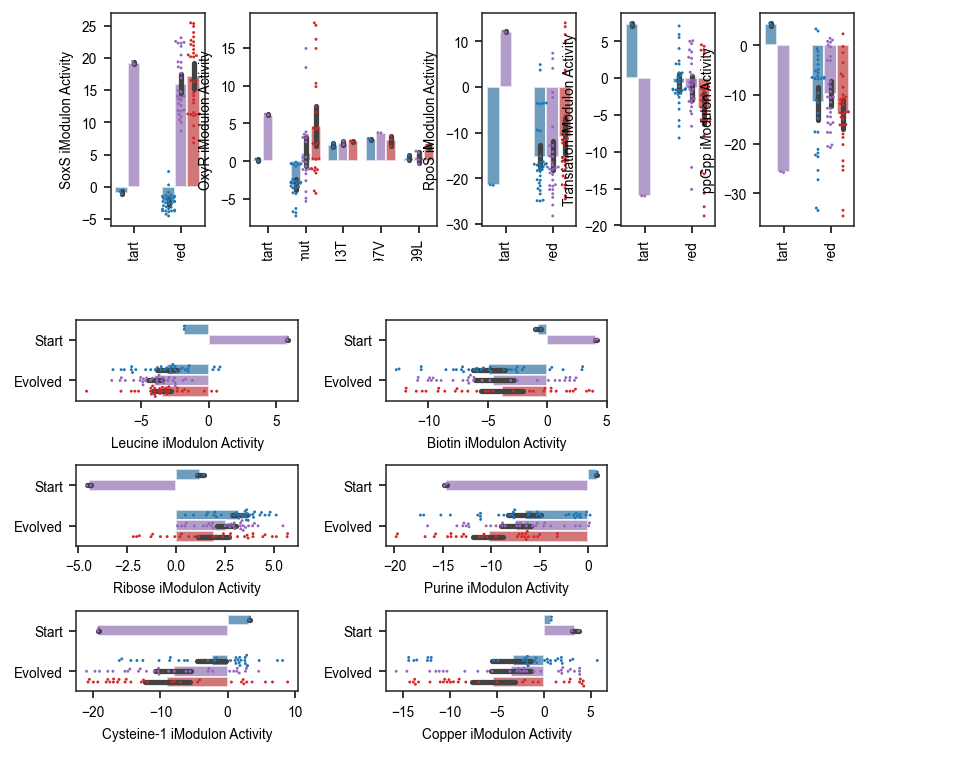

In [11]:
# layout for figure
fig = plt.figure(figsize = (6.85, 5.525), dpi = 140)
subfigs = fig.subfigures(2, 1, height_ratios = [2, 3.5])
top_axs = subfigs[0].subplots(1, 5, 
            gridspec_kw = {'width_ratios': [1, 2, 1, 1, 1],
                           'wspace': 0.4})

btm_subsubfigs = subfigs[1].subfigures(1, 2, width_ratios = [2.5, 1])
btm_axs = btm_subsubfigs[0].subplots(3, 2,
            gridspec_kw = {'wspace': 0.4, 'hspace':0.8})

# draw plots
im_bar_swarm(ica, ros_meta, 'Superoxide', ax = top_axs[0])
top_axs[0].set_ylabel('SoxS iModulon Activity')

oxyR_dict = {'Start': ['0_0'],
             'No oxyR mut': ['1_0','1_1','1_2','1_4',
                         '2_0','2_1','2_2','2_3',
                         '3_0','3_1','3_2','3_3','3_4'],
             'oxyR P99L': ['1_3'],
             'oxyR G197V': ['2_1'],
             'oxyR A213T':['1_2']}
im_bar_swarm(ica, ros_meta, 'OxyR', strain_dict = oxyR_dict, 
              ax = top_axs[1])

im_bar_swarm(ica, ros_meta, 'RpoS', ax = top_axs[2])
im_bar_swarm(ica, ros_meta, 'Translation', ax = top_axs[3])
im_bar_swarm(ica, ros_meta, 'ppGpp', ax = top_axs[4])

im_bar_swarm(ica, ros_meta, 'Leucine', ax = btm_axs[0][0],
             orientation = 'horizontal', x_rot = 0)
im_bar_swarm(ica, ros_meta, 'Biotin', ax = btm_axs[0][1],
             orientation = 'horizontal', x_rot = 0)
im_bar_swarm(ica, ros_meta, 'Ribose', ax = btm_axs[1][0],
             orientation = 'horizontal', x_rot = 0)
im_bar_swarm(ica, ros_meta, 'Purine', ax = btm_axs[1][1],
             orientation = 'horizontal', x_rot = 0)
im_bar_swarm(ica, ros_meta, 'Cysteine-1', ax = btm_axs[2][0],
             orientation = 'horizontal', x_rot = 0)
im_bar_swarm(ica, ros_meta, 'Copper', ax = btm_axs[2][1],
             orientation = 'horizontal', x_rot = 0)

plt.savefig('output/fig4_raw.pdf')